# PACKAGES USED FOR ANALYSIS
---

In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
conda install -c conda-forge pandas-profiling

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas_profiling as pdp

---
# TAIM SWID'S PERSONAL EDA FOR PM 2 
----


In [4]:
# In this notebook I will be conducting my EDA to find any correlation between my variables and to try and find answers that may aid in finding a conclusion to our hypothesis.


In [15]:
df = pd.read_csv('https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [16]:
profile = pdp.ProfileReport(df)
profile

---
## STEP 1: *DATA WRANGLING AND CLEANUP*
---

In [6]:
# converting "bmi" & "charges" columns into 2 decimal place values.
df['bmi'] = df['bmi'].round(2)
df
df['charges'] = df['charges'].round(2)
df

age     sex    bmi  children smoker     region   charges
0      19  female  27.90         0    yes  southwest  16884.92
1      18    male  33.77         1     no  southeast   1725.55
2      28    male  33.00         3     no  southeast   4449.46
3      33    male  22.70         0     no  northwest  21984.47
4      32    male  28.88         0     no  northwest   3866.86
...   ...     ...    ...       ...    ...        ...       ...
1333   50    male  30.97         3     no  northwest  10600.55
1334   18  female  31.92         0     no  northeast   2205.98
1335   18  female  36.85         0     no  southeast   1629.83
1336   21  female  25.80         0     no  southwest   2007.94
1337   61  female  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [7]:
# In this cell i changed the data types for the following columns to help me make edits later on
df['sex'] = df['sex'].astype('str')
df['smoker'] = df['smoker'].astype('str')
df['region'] = df['region'].astype('str')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# changing the values in the below columns to capitalize them.
df['sex'] = df['sex'].str.capitalize()
df['smoker'] = df['smoker'].str.capitalize()
df['region'] = df['region'].str.capitalize()
df

age     sex    bmi  children smoker     region   charges
0      19  Female  27.90         0    Yes  Southwest  16884.92
1      18    Male  33.77         1     No  Southeast   1725.55
2      28    Male  33.00         3     No  Southeast   4449.46
3      33    Male  22.70         0     No  Northwest  21984.47
4      32    Male  28.88         0     No  Northwest   3866.86
...   ...     ...    ...       ...    ...        ...       ...
1333   50    Male  30.97         3     No  Northwest  10600.55
1334   18  Female  31.92         0     No  Northeast   2205.98
1335   18  Female  36.85         0     No  Southeast   1629.83
1336   21  Female  25.80         0     No  Southwest   2007.94
1337   61  Female  29.07         0    Yes  Northwest  29141.36

[1338 rows x 7 columns]

In [10]:
# Changing the column headers so they are upper case.
df.columns = df.columns.str.upper()
df

AGE     SEX    BMI  CHILDREN SMOKER     REGION   CHARGES
0      19  Female  27.90         0    Yes  Southwest  16884.92
1      18    Male  33.77         1     No  Southeast   1725.55
2      28    Male  33.00         3     No  Southeast   4449.46
3      33    Male  22.70         0     No  Northwest  21984.47
4      32    Male  28.88         0     No  Northwest   3866.86
...   ...     ...    ...       ...    ...        ...       ...
1333   50    Male  30.97         3     No  Northwest  10600.55
1334   18  Female  31.92         0     No  Northeast   2205.98
1335   18  Female  36.85         0     No  Southeast   1629.83
1336   21  Female  25.80         0     No  Southwest   2007.94
1337   61  Female  29.07         0    Yes  Northwest  29141.36

[1338 rows x 7 columns]

In [11]:
# Summary of Stats for each column.
df.describe()

AGE          BMI     CHILDREN       CHARGES
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663572     1.094918  13270.422280
std      14.049960     6.097951     1.205493  12110.011259
min      18.000000    15.960000     0.000000   1121.870000
25%      27.000000    26.297500     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.692500     2.000000  16639.915000
max      64.000000    53.130000     5.000000  63770.430000

---
## Step 2: *VISUALIZING THE DATA*
---

<AxesSubplot:xlabel='SEX', ylabel='CHARGES'>

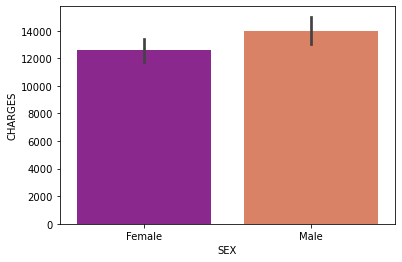

In [39]:
## The first appropriate graph that I would like to use is the Bar plot.
## This would help me focus on the distribution of some of the variables that I think would effect the medical charges of patients.
sns.barplot(x='SEX', y='CHARGES', data=df, estimator=np.mean, palette='plasma')

**What this graph shows us is that the avergae paid on medical care is greater for men than for women** 

<AxesSubplot:xlabel='SEX', ylabel='count'>

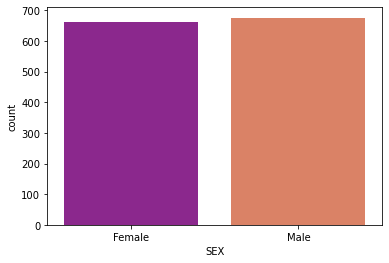

In [38]:
## I want to check how many Males and Females are included in this dataset 
sns.countplot(x='SEX', data=df, palette='plasma')

**I wanted to check if the dataset might be biased containing more of one gender, but as we can see above that is not the case**

<AxesSubplot:>

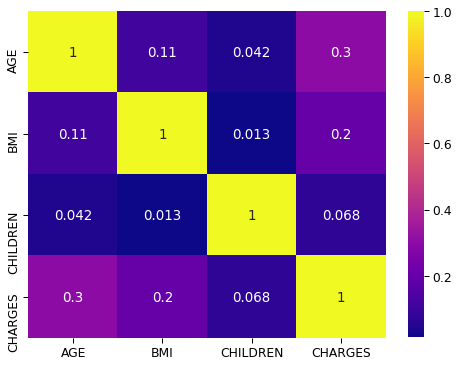

In [41]:
## At this point I am not sure exactly which variable might affect the medical charges.
## I am going to use a heatmap to see which variables affect the charges most.
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
df_hm = df.corr()
sns.heatmap(df_hm, annot=True, cmap='plasma', linecolor='white')

**This heatmap did not really help me much as the two variables I was concerned with didn't show up which were gender and whether the patient is a smoker or not**

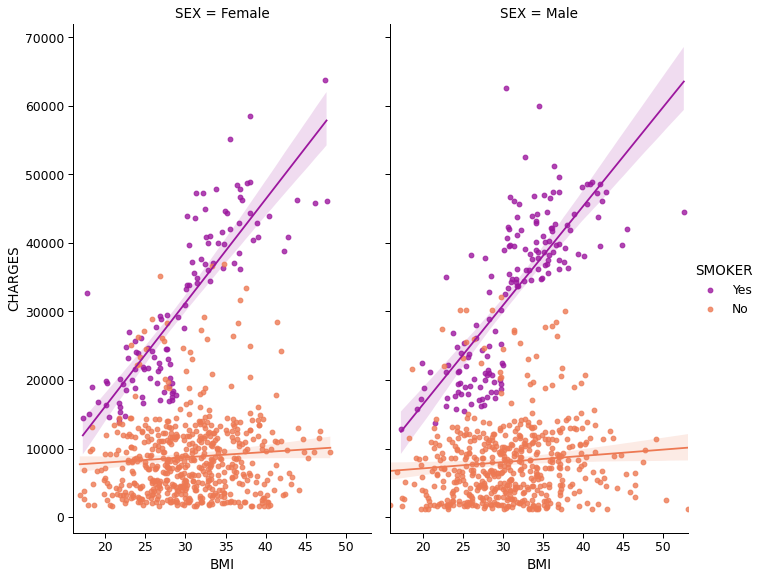

In [58]:
## Now I have 3 Variables that I suspect would effect medical charges.
## These 3 variables are BMI, SEX & WHETHER THEY SMOKE OR NOT.
## I need a grid that will vizualize these variables against medical charges.

sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='BMI', y='CHARGES', data=df, col='SEX', hue='SMOKER',
          height=8, aspect=0.6, palette='plasma')


**From the graph above we can deduce that being smoker leads to greater medical charges for both men and women**

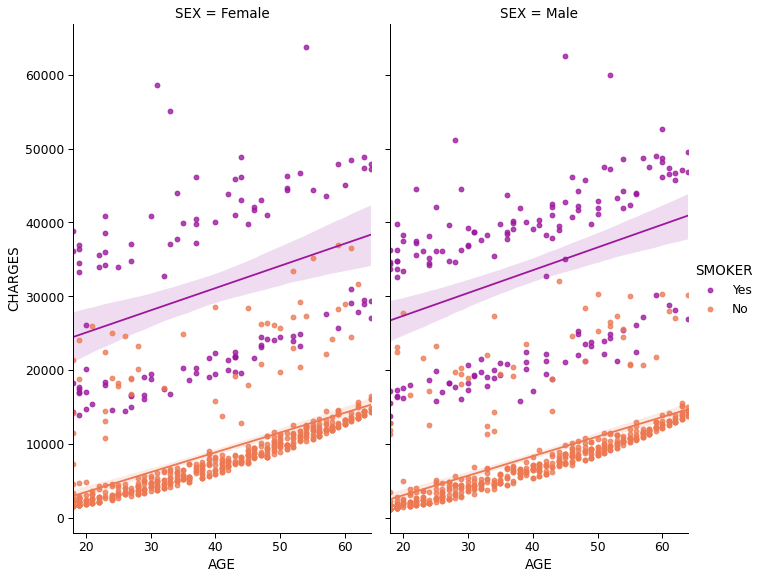

In [57]:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='AGE', y='CHARGES', data=df, col='SEX', hue='SMOKER',
          height=8, aspect=0.6, palette='plasma')

**From the graph above I can conclude that Age affects how much individiuals pay for medical care. This includes both males and females**

---
# CONCLUSION:

### Now we know that the variables that affect how much individuals pay for medical health are primarily age, BMI and whether one is a smoker or not.
---

<AxesSubplot:xlabel='SEX', ylabel='BMI'>

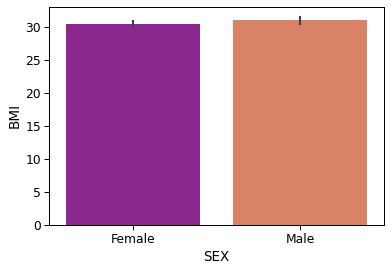

In [77]:
## Now I would like to know which gender is most likely to be a smoker?
## Which gender is likely to have a greater BMI?
## What is the avergae age for both Males & Females in this dataset?

sns.barplot(x='SEX', y='BMI', data=df, estimator=np.mean, palette='plasma')

**We can now conclude that males and females in this dataset have almost the same average BMI.**

<AxesSubplot:xlabel='SEX', ylabel='AGE'>

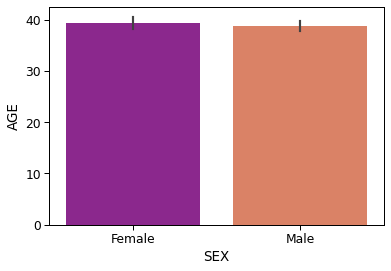

In [78]:
sns.barplot(x='SEX', y='AGE', data=df, estimator=np.mean, palette='plasma')

**We can now conclude that males and females in this dataset have almost the same average age.**

In [108]:
Count_F = df[(df.SMOKER == 'Yes') & (df.SEX == 'Female')].count()

AGE         115
SEX         115
BMI         115
CHILDREN    115
SMOKER      115
REGION      115
CHARGES     115
dtype: int64

In [111]:
Count_M = df[(df.SMOKER == 'Yes') & (df.SEX == 'Male')].count()
Count_M

AGE         159
SEX         159
BMI         159
CHILDREN    159
SMOKER      159
REGION      159
CHARGES     159
dtype: int64

**Now I know that there are more Male smokers than Female smokers**